# Basic data IO and analysis

First, we need to import all the necessary libraries and set up some environment variables.

In [1]:
import re
import requests
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm

sns.set_context('talk')
pd.set_option('float_format', '{:6.2f}'.format)
%matplotlib inline

Load the zip file from the web and save it to your hard drive.

In [2]:
url = 'http://databank.worldbank.org/data/download/Edstats_csv.zip'
path = 'data/WorldBank/Edstats_csv.zip'

response = requests.get(url)
with open(path, "wb") as file:
    file.write(response.content)

Show contents of the zip file.

In [3]:
zf = zipfile.ZipFile(path)
files = zf.namelist()

print(files)

['EdStats_Data.csv', 'EdStats_Country.csv', 'EdStats_Series.csv', 'EdStats_Country-Series.csv', 'EdStats_Series-Time.csv', 'EdStats_FootNote.csv']


Read csv-formatted data directly from the zip file into pandas DataFrame. Also rename some columns for prettier output.

In [4]:
data = pd.read_csv(zf.open(files[0]))
series = pd.read_csv(zf.open(files[2]))
series.rename(columns={series.columns[0]: 'Series Code'}, inplace=True)
data.rename(columns={data.columns[0]: 'Country Name'}, inplace=True)

print(series.columns)

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


Show unique values of the `Topic` column.

In [5]:
print(series['Topic'].unique())

['Attainment' 'Education Equality' 'Background' 'Learning Outcomes'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)'
 'School Health and School Feeding (SABER)'
 'Engaging the Private Sector (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Workforce Development (SABER)' 'Literacy' 'Primary' 'Secondary'
 'Tertiary' 'Pre-Primary' 'Expenditures' 'Laber' 'Population' 'EMIS'
 'Post-Secondary/Non-Tertiary']


Leave only those rows that have `Expenditures` in the column `Topic`. Next, leave only those that contain `PPP` in the `Indicator Name` column values. Finally, create a dictionary with a pair of variable key and its meaningful name.

In [6]:
subset = series.query("Topic == 'Expenditures'")[['Series Code', 'Indicator Name']]
subset = subset[subset['Indicator Name'].str.contains('PPP')]
print(subset.values)
xvar = {'UIS.XUNIT.PPP.1.FSGOV': 'Expenditure per student'}

[['UIS.XUNIT.PPP.1.FSGOV'
  'Government expenditure per primary student (PPP$)']
 ['UIS.XUNIT.PPP.2.FSGOV'
  'Government expenditure per lower secondary student (PPP$)']
 ['UIS.XUNIT.PPP.23.FSGOV'
  'Government expenditure per secondary student (PPP$)']
 ['UIS.XUNIT.PPP.3.FSGOV'
  'Government expenditure per upper secondary student (PPP$)']
 ['UIS.XUNIT.PPP.4.FSGOV'
  'Government expenditure per post-secondary non-tertiary student (PPP$)']
 ['UIS.XUNIT.PPP.56.FSGOV'
  'Government expenditure per tertiary student (PPP$)']
 ['UIS.XUNIT.PPPCONST.1.FSGOV'
  'Government expenditure per primary student (constant PPP$)']
 ['UIS.XUNIT.PPPCONST.2.FSGOV'
  'Government expenditure per lower secondary student (constant PPP$)']
 ['UIS.XUNIT.PPPCONST.23.FSGOV'
  'Government expenditure per secondary student (constant PPP$)']
 ['UIS.XUNIT.PPPCONST.3.FSGOV'
  'Government expenditure per upper secondary student (constant PPP$)']
 ['UIS.XUNIT.PPPCONST.4.FSGOV'
  'Government expenditure per post-secondar

Do the same for `Attainment` among `Topic` values and slightly more involved subset of `Indicator Name`. Here we require that it contains both strings, `with primary schooling` and `15`.

In [7]:
subset = series.query("Topic == 'Attainment'")[['Series Code', 'Indicator Name']]
subset = subset[subset['Indicator Name'].str.contains('(?=.*with primary schooling)(?=.*15)')]
print(subset.values)
yvar = {'BAR.PRM.CMPT.15UP.ZS': 'Pct with schooling'}

[['BAR.PRM.CMPT.1519.FE.ZS'
  'Barro-Lee: Percentage of female population age 15-19 with primary schooling. Completed Primary']
 ['BAR.PRM.CMPT.1519.ZS'
  'Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary']
 ['BAR.PRM.CMPT.15UP.FE.ZS'
  'Barro-Lee: Percentage of female population age 15+ with primary schooling. Completed Primary']
 ['BAR.PRM.CMPT.15UP.ZS'
  'Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary']
 ['BAR.PRM.ICMP.1519.FE.ZS'
  'Barro-Lee: Percentage of female population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)']
 ['BAR.PRM.ICMP.1519.ZS'
  'Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)']
 ['BAR.PRM.ICMP.15UP.FE.ZS'
  'Barro-Lee: Percentage of female population age 15+ with primary schooling. Total (Incomplete and Completed Primary)']
 ['BAR.PRM.ICMP.15UP.ZS'
  'Barro-Lee: Percentage of population age 15+

Now show all column names in the primary data set.

In [8]:
print(data.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2020', '2025', '2030', '2035', '2040',
       '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085',
       '2090', '2095', '2100', 'Unnamed: 61'],
      dtype='object')


Combine two dictionaries into one.

In [9]:
renames = xvar.copy()
renames.update(yvar)
print(renames)

{'UIS.XUNIT.PPP.1.FSGOV': 'Expenditure per student', 'BAR.PRM.CMPT.15UP.ZS': 'Pct with schooling'}


Subset the data to include only three interesting columns that we have found above and only for the year 2010.

In [10]:
cols = ['Country Name', 'Indicator Code', '2010']
data_sub = data.ix[data['Indicator Code'].isin(renames.keys()), cols].dropna()
data_sub.replace({'Indicator Code': renames}, inplace=True)
data_sub.set_index(cols[:2], inplace=True)
data_sub = data_sub[cols[-1]].unstack(cols[1]).dropna()
data_sub.columns.name = 'Indicator'
data_sub.index.name = 'Country'

print(data_sub.head())

Indicator  Expenditure per student  Pct with schooling
Country                                               
Australia                  8767.16                5.21
Austria                   10469.72               18.40
Belgium                    8802.47                9.50
Belize                     1374.39               14.29
Benin                       240.69               12.18


Export data to Excel.

In [11]:
data_sub.to_excel('data/WorldBank/education.xlsx', sheet_name='data')

Now suppose we already have the data saved in the Excel file. Let's read it from scratch into pandas DataFrame.

In [12]:
education = pd.read_excel('data/WorldBank/education.xlsx', sheet_name='data', index_col=0)
print(education.head())

           Expenditure per student  Pct with schooling
Country                                               
Australia                  8767.16                5.21
Austria                   10469.72               18.40
Belgium                    8802.47                9.50
Belize                     1374.39               14.29
Benin                       240.69               12.18


Let's see how percentage of educated population depends on government expenditures on primary students. Also, save the picture to the pdf file.

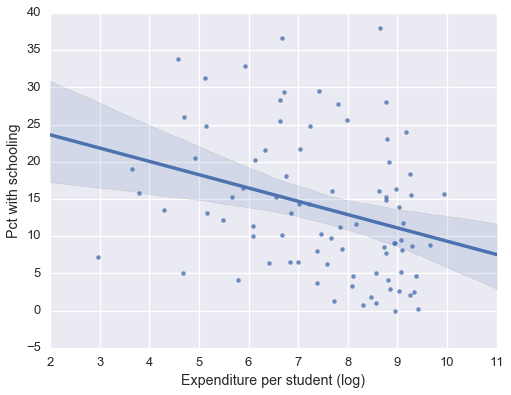

In [13]:
education['Expenditure per student (log)'] = np.log(education['Expenditure per student'])

fig = plt.figure(figsize=(8, 6))
sns.regplot(x='Expenditure per student (log)', y='Pct with schooling',
            data=education, ax=fig.gca())
plt.savefig('plots/education.pdf')
plt.show()

To be more precise we can quantify the effect of expenditures on schooling via simple OLS regression.

In [14]:
formula = 'Q("Pct with schooling") ~ np.log(Q("Expenditure per student"))'
result = sm.ols(formula=formula, data=education).fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     Q("Pct with schooling")   R-squared:                       0.095
Model:                                 OLS   Adj. R-squared:                  0.084
Method:                      Least Squares   F-statistic:                     8.718
Date:                     Fri, 06 May 2016   Prob (F-statistic):            0.00410
Time:                             11:53:03   Log-Likelihood:                -306.27
No. Observations:                       85   AIC:                             616.5
Df Residuals:                           83   BIC:                             621.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------

And save the key result to the LaTeX table.

In [15]:
out = pd.DataFrame({'Parameter': result.params, 't-stat': result.tvalues})
out.to_latex('tables/education_ols.tex')
print(out)

                                      Parameter  t-stat
Intercept                                 27.19    5.87
np.log(Q("Expenditure per student"))      -1.79   -2.95
